In [1]:
import warnings
warnings.filterwarnings("ignore")

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
train = pd.read_csv('data/train.csv')
train.head()

,category,sub_category,crimeaditionalinfo
0,Online and Social Media Related Crime,Cyber Bullying Stalking Sexting,I had continue received random calls and abusi...
1,Online Financial Fraud,Fraud CallVishing,The above fraudster is continuously messaging ...
2,Online Gambling Betting,Online Gambling Betting,He is acting like a police and demanding for m...
3,Online and Social Media Related Crime,Online Job Fraud,In apna Job I have applied for job interview f...
4,Online Financial Fraud,Fraud CallVishing,I received a call from lady stating that she w...


In [4]:
train.shape

(93686, 3)

In [5]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 93686 entries, 0 to 93685
Data columns (total 3 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   category            93686 non-null  object
 1   sub_category        87095 non-null  object
 2   crimeaditionalinfo  93665 non-null  object
dtypes: object(3)
memory usage: 2.1+ MB


In [6]:
print(pd.Series({"Number of observations with missing values": len(train) - len(train.dropna()),
                 "Number of duplicate observations": train.duplicated().sum()}).to_string())

Number of observations with missing values    6612
Number of duplicate observations              7803


In [7]:
train.drop_duplicates(inplace = True)
train.reset_index(drop = True, inplace = True)

In [8]:
train.shape

(85883, 3)

In [9]:
for col in train.columns:
    print(f'Column: {col}, number of missing values: {train[col].isnull().sum()}')

Column: category, number of missing values: 0
Column: sub_category, number of missing values: 3858
Column: crimeaditionalinfo, number of missing values: 7


In [10]:
train.dropna(subset=['crimeaditionalinfo'],inplace=True)

In [11]:
missing_sub_category = train[train['sub_category'].isnull()]
missing_sub_category.head()

,category,sub_category,crimeaditionalinfo
8,RapeGang Rape RGRSexually Abusive Content,NaN,I got the message on Whatsapp to my number The...
25,RapeGang Rape RGRSexually Abusive Content,NaN,Respected Sir\r\n\r\nA very serious matter I w...
39,Sexually Explicit Act,NaN,httpswwwxnxxtvvideousapbfuckkkarrr\r\n\r\n Abo...
45,Sexually Obscene material,NaN,Many fake accounts are created and Im sufferin...
49,Sexually Explicit Act,NaN,SirMaam \r\nThis is my third report on this re...


In [12]:
missing_sub_category['category'].value_counts()

category
Sexually Obscene material                               1764
Sexually Explicit Act                                   1489
Child Pornography CPChild Sexual Abuse Material CSAM     357
RapeGang Rape RGRSexually Abusive Content                248
Name: count, dtype: int64

In [13]:
train['category'].value_counts()

category
Online Financial Fraud                                  52496
Online and Social Media Related Crime                   12076
Any Other Cyber Crime                                   10811
Cyber Attack/ Dependent Crimes                           3608
Sexually Obscene material                                1764
Hacking  Damage to computercomputer system etc           1709
Sexually Explicit Act                                    1489
Cryptocurrency Crime                                      473
Online Gambling  Betting                                  444
Child Pornography CPChild Sexual Abuse Material CSAM      357
RapeGang Rape RGRSexually Abusive Content                 248
Online Cyber Trafficking                                  183
Cyber Terrorism                                           161
Ransomware                                                 56
Report Unlawful Content                                     1
Name: count, dtype: int64

In [14]:
train['sub_category'].fillna('',inplace=True)

In [15]:
len(train['category'].unique())

15

In [16]:
len(train['sub_category'].unique())

36

In [17]:
grouped_counts = train.groupby(['category', 'sub_category']).size()

print("\nCounts grouped by category and sub_category:")
print(grouped_counts)


Counts grouped by category and sub_category:
category                                              sub_category                                                        
Any Other Cyber Crime                                 Other                                                                   10811
Child Pornography CPChild Sexual Abuse Material CSAM                                                                            357
Cryptocurrency Crime                                  Cryptocurrency Fraud                                                      473
Cyber Attack/ Dependent Crimes                        Data Breach/Theft                                                         484
                                                      Denial of Service (DoS)/Distributed Denial of Service (DDOS) attacks      504
                                                      Hacking/Defacement                                                        540
                                       

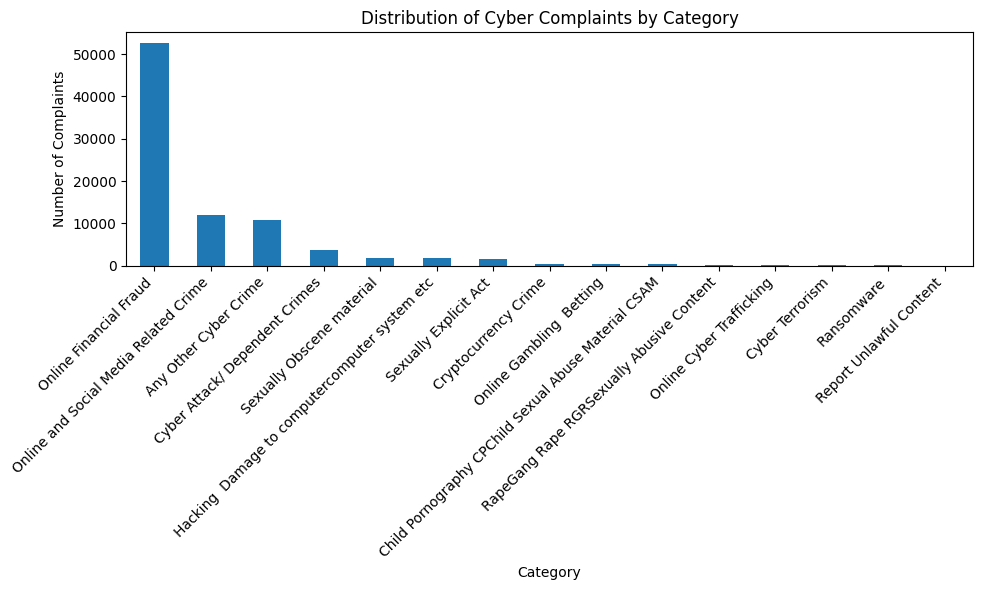

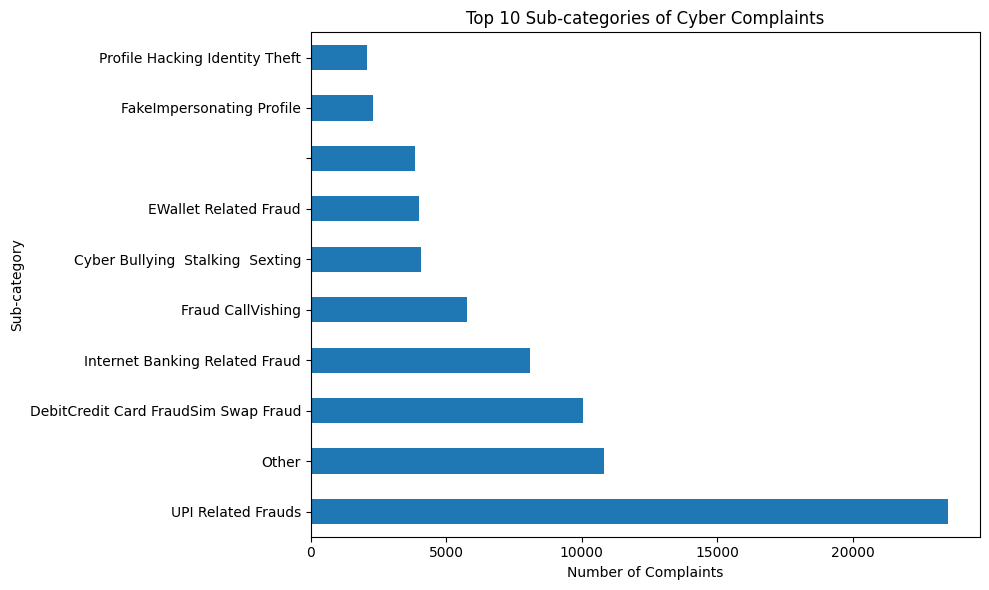

In [20]:
# Set style and figure size for better visualization
# plt.rcParams['figure.figsize'] = (15, 8)

# Plot main categories distribution
plt.figure(figsize=(10, 6))
train['category'].value_counts().plot(kind='bar')
plt.title('Distribution of Cyber Complaints by Category')
plt.xlabel('Category')
plt.ylabel('Number of Complaints')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

# Top 10 subcategories
plt.figure(figsize=(10, 6))
train['sub_category'].value_counts().head(10).plot(kind='barh')
plt.title('Top 10 Sub-categories of Cyber Complaints')
plt.xlabel('Number of Complaints')
plt.ylabel('Sub-category')
plt.tight_layout()
plt.show()

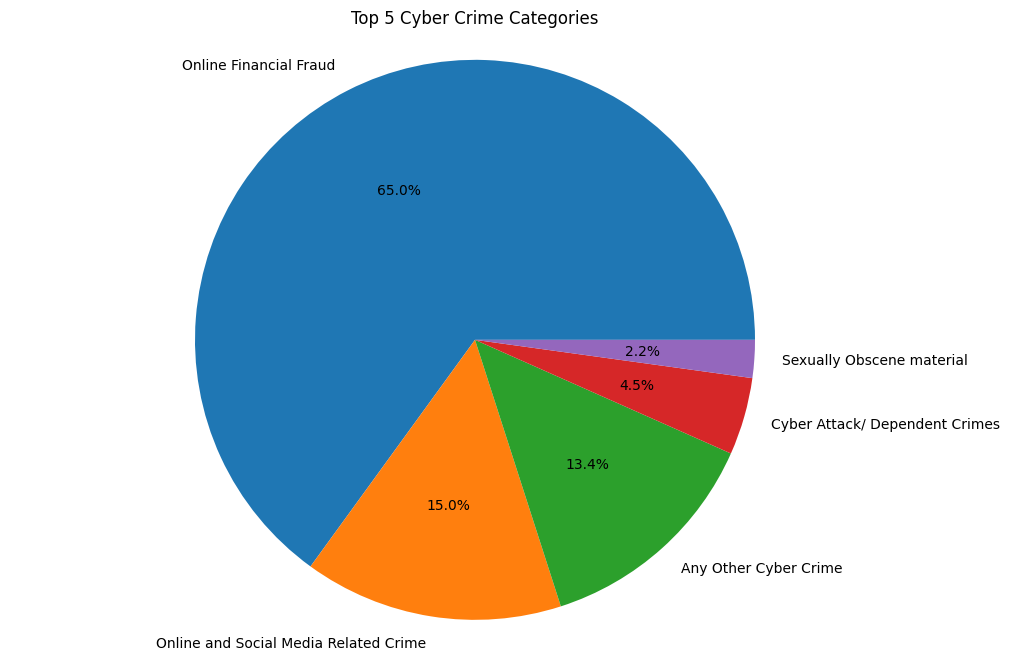

In [37]:
# Pie chart of top 5 categories
plt.figure(figsize=(12, 8))
top_categories = train['category'].value_counts().head(5)
plt.pie(top_categories, labels=top_categories.index, autopct='%1.1f%%')
plt.title('Top 5 Cyber Crime Categories')
plt.axis('equal')
plt.show()

<Figure size 1500x1000 with 0 Axes>

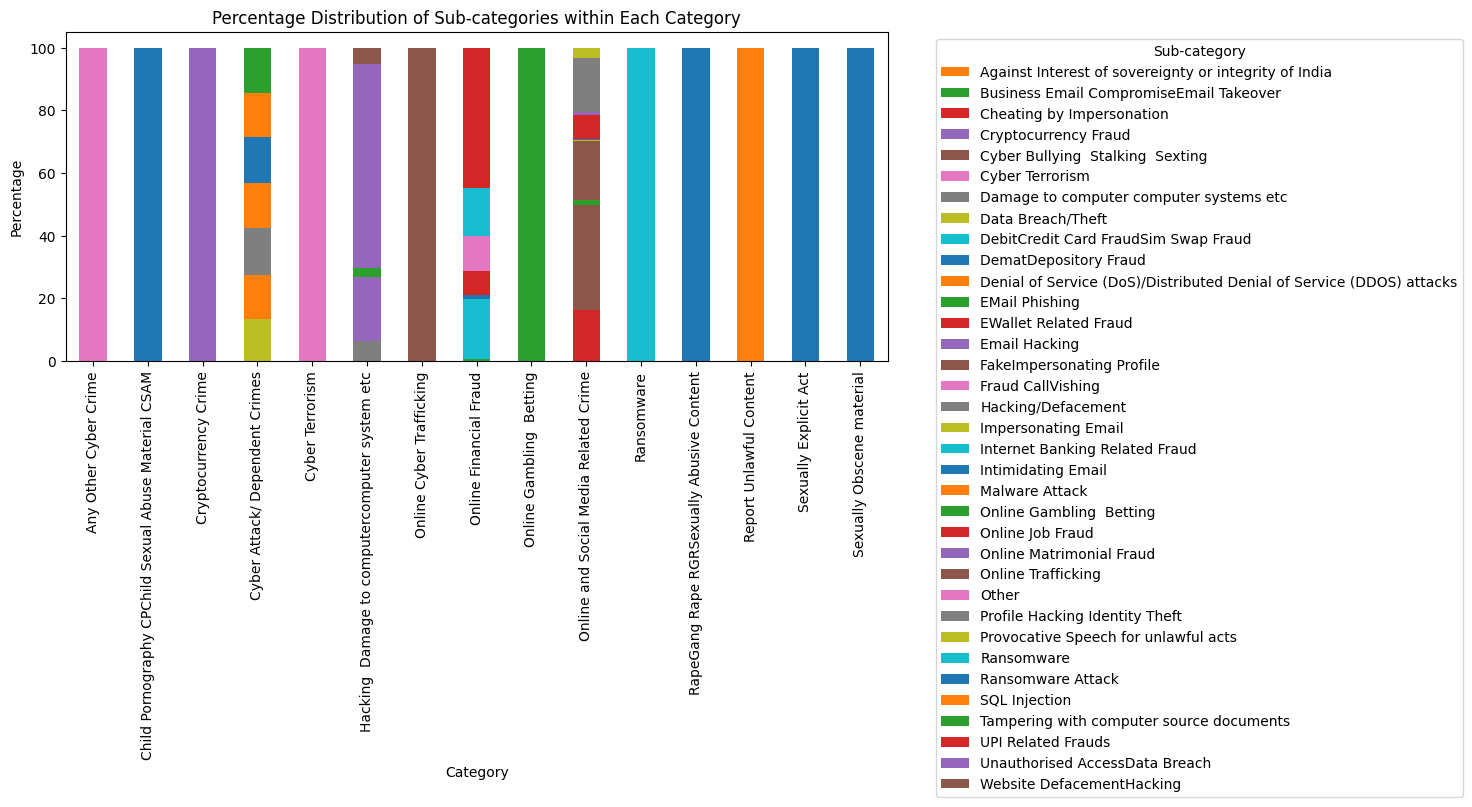

In [38]:
# Create percentage stacked bar chart
cat_subcat_counts = train.groupby(['category', 'sub_category']).size().unstack(fill_value=0)
cat_subcat_percentages = cat_subcat_counts.div(cat_subcat_counts.sum(axis=1), axis=0) * 100

plt.figure(figsize=(15, 10))
cat_subcat_percentages.plot(kind='bar', stacked=True)
plt.title('Percentage Distribution of Sub-categories within Each Category')
plt.xlabel('Category')
plt.ylabel('Percentage')
plt.legend(title='Sub-category', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

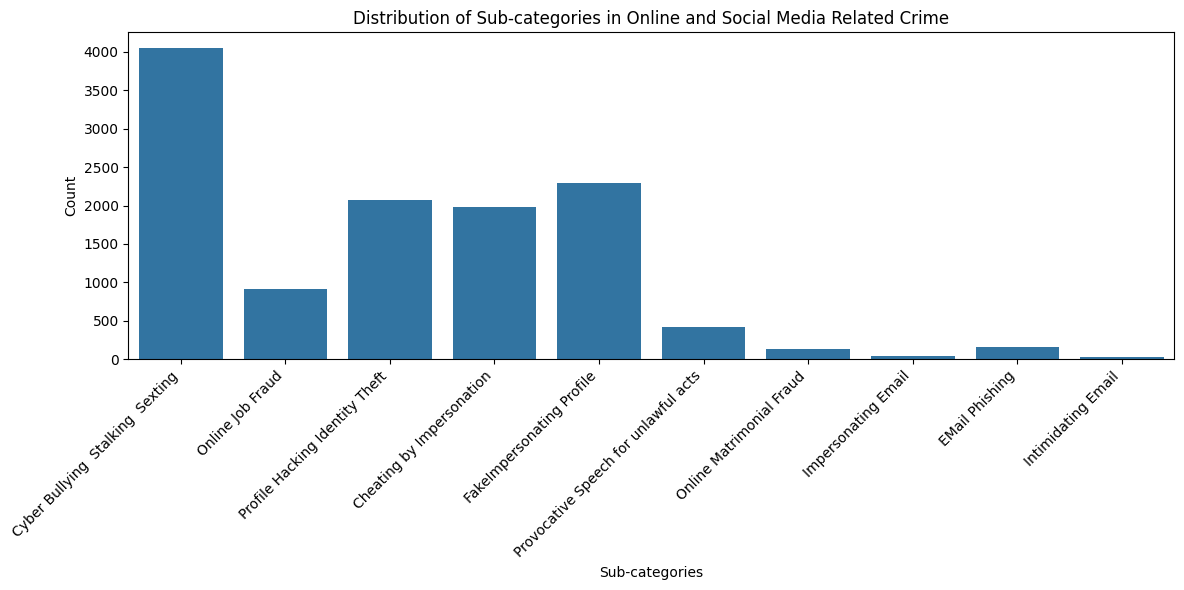

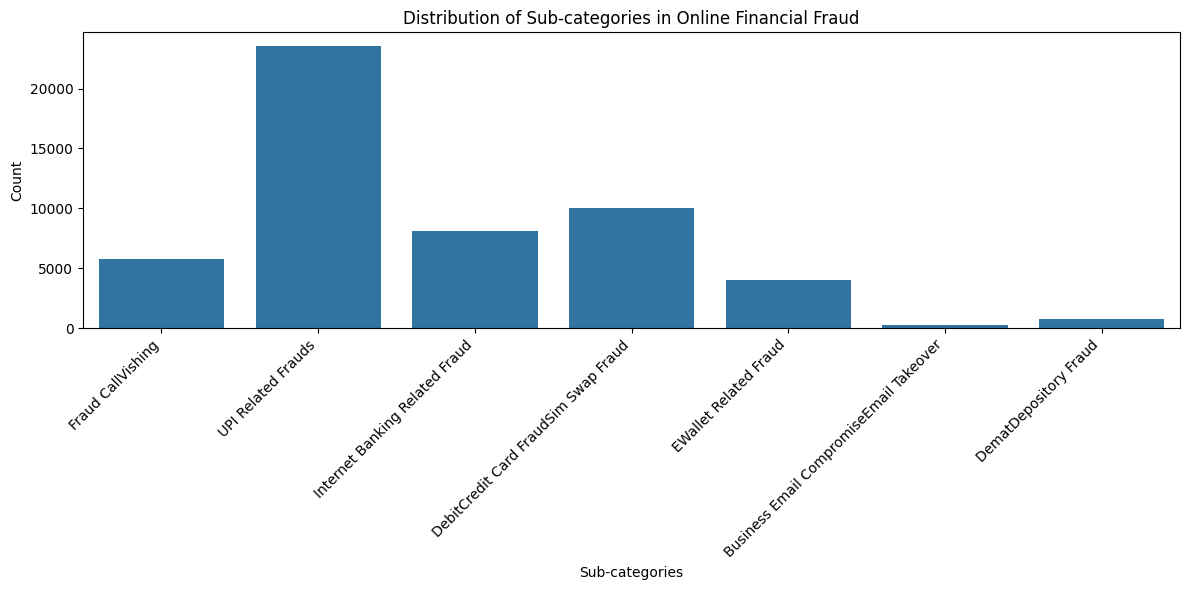

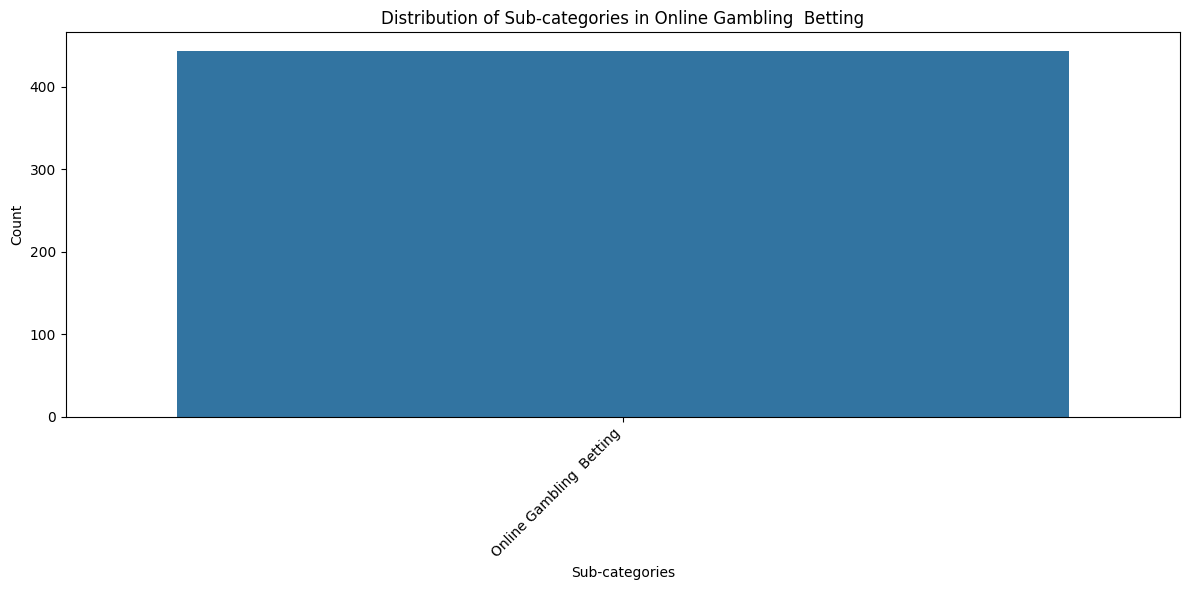

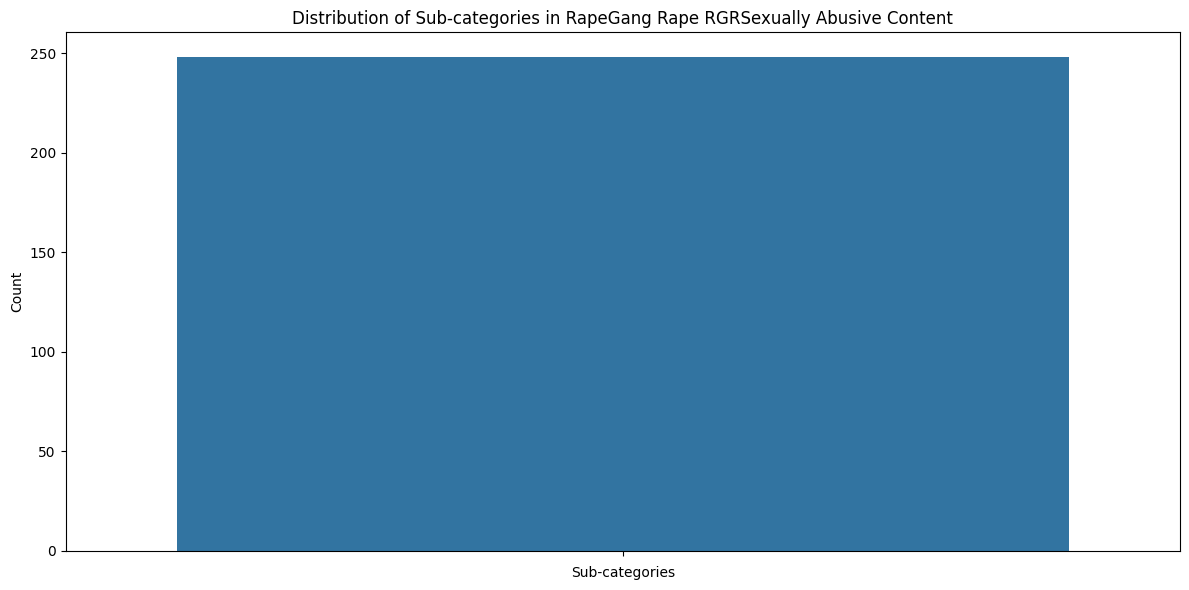

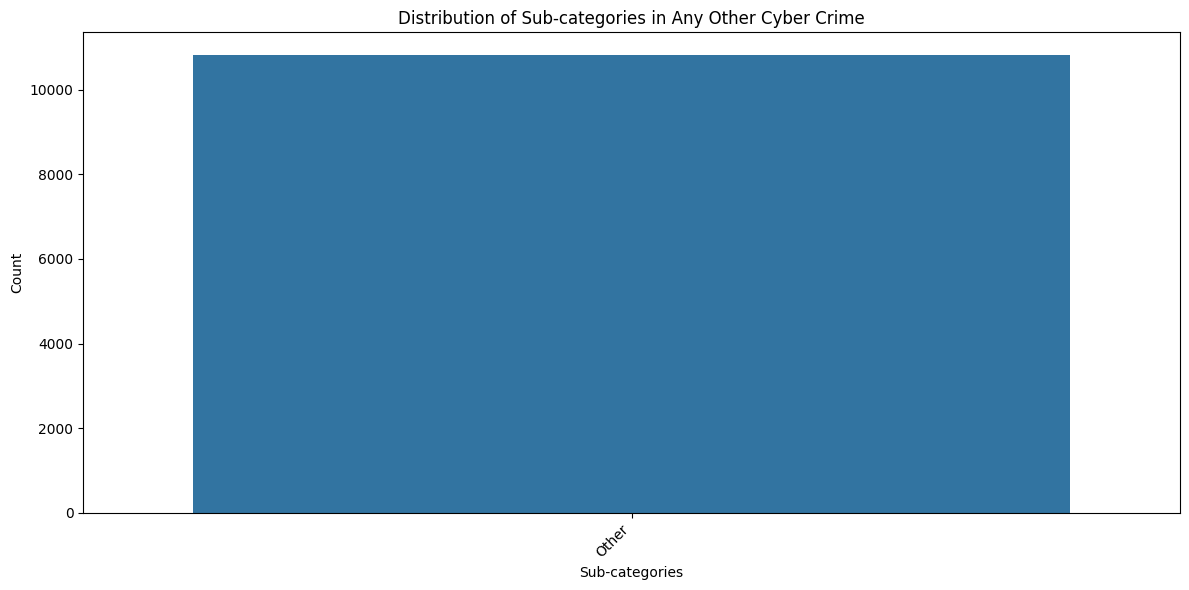

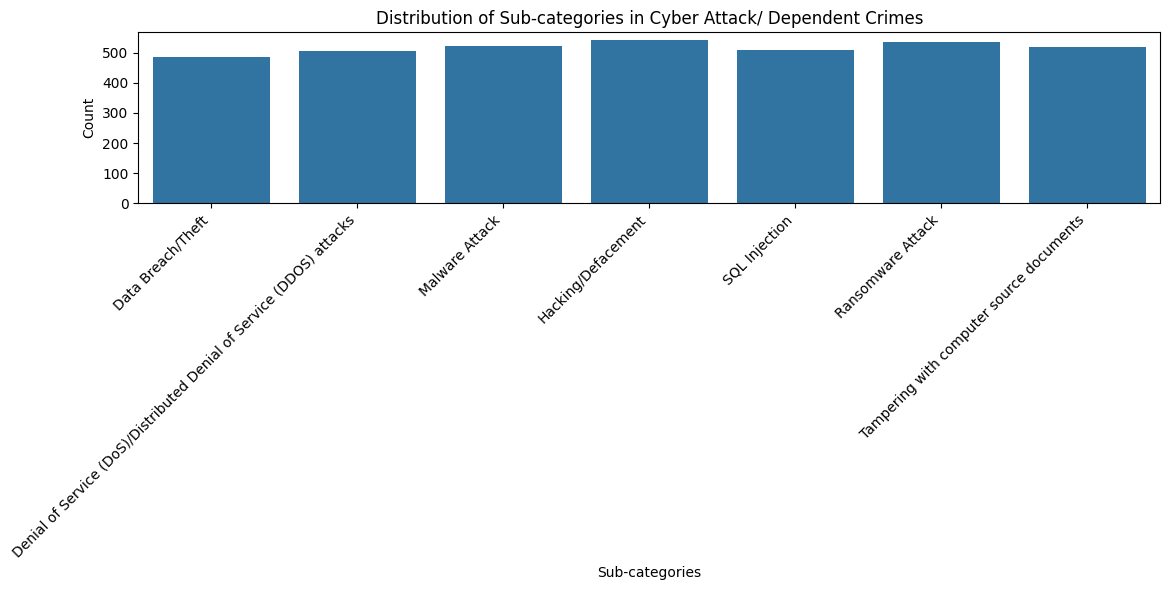

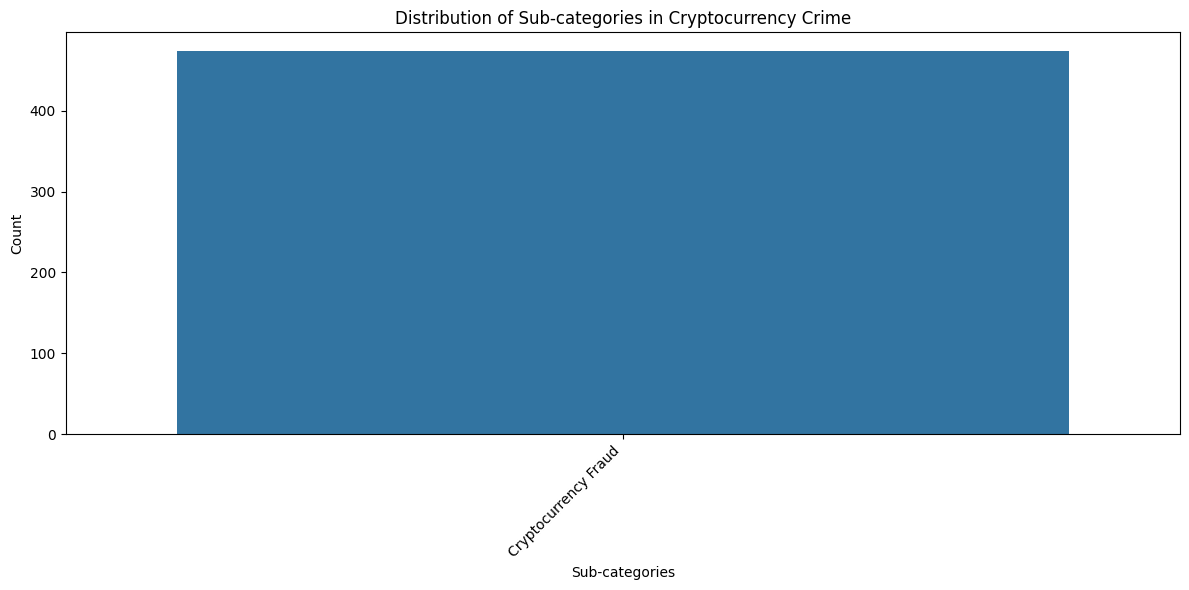

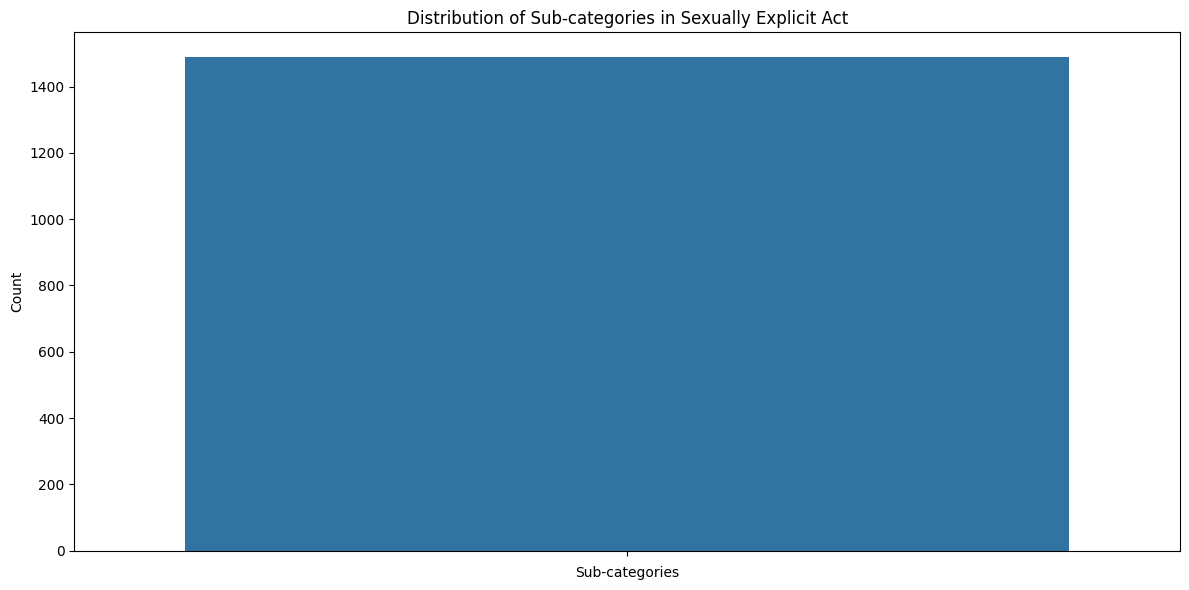

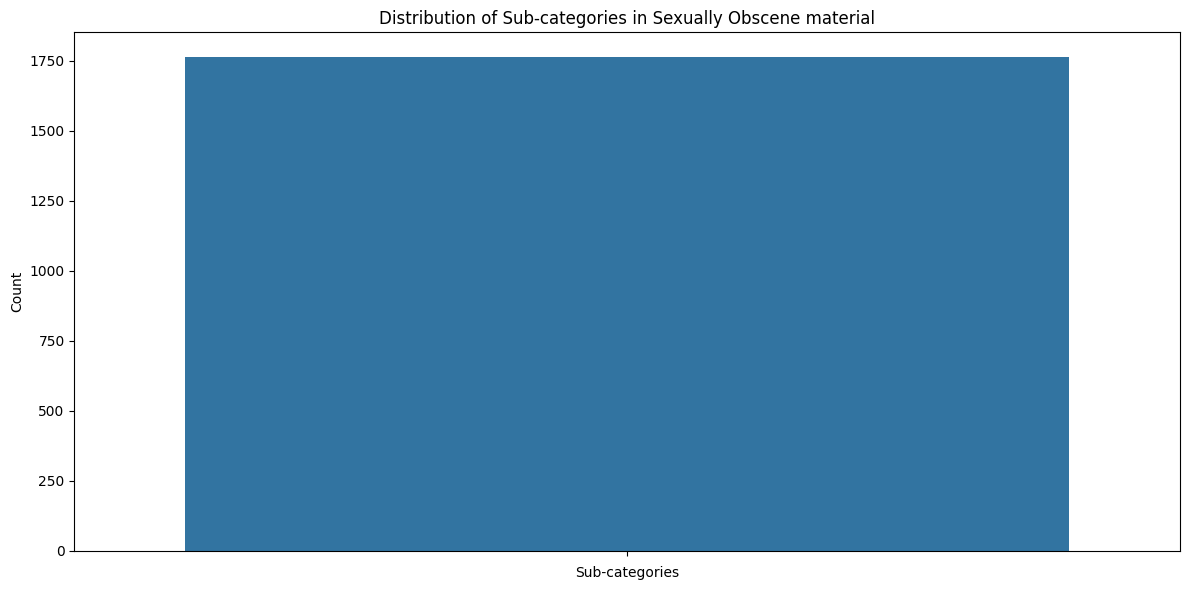

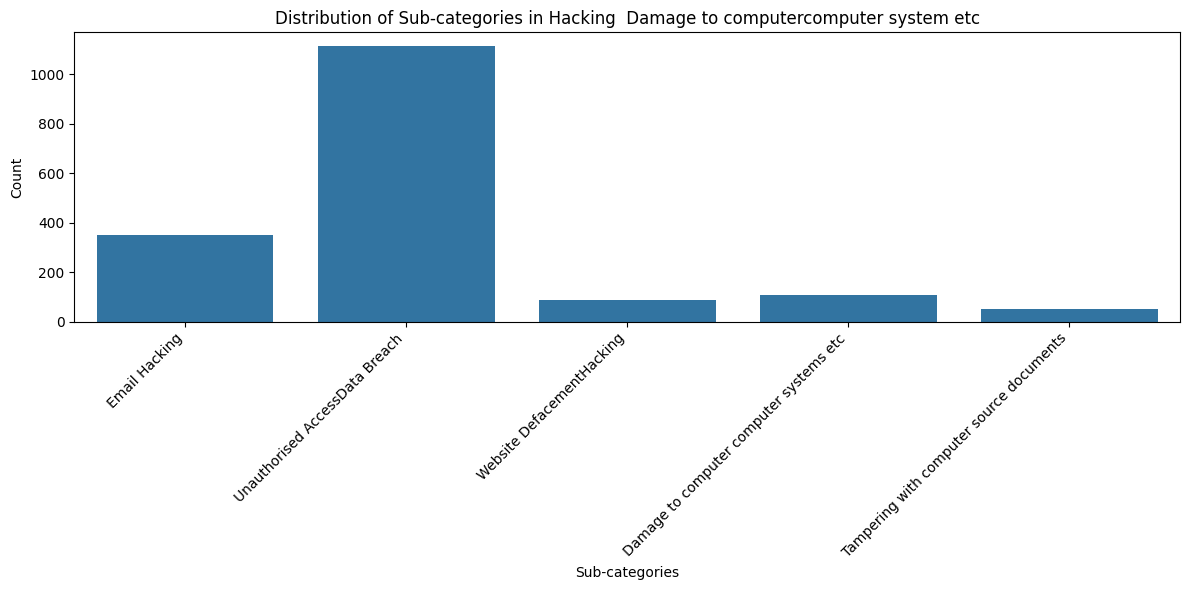

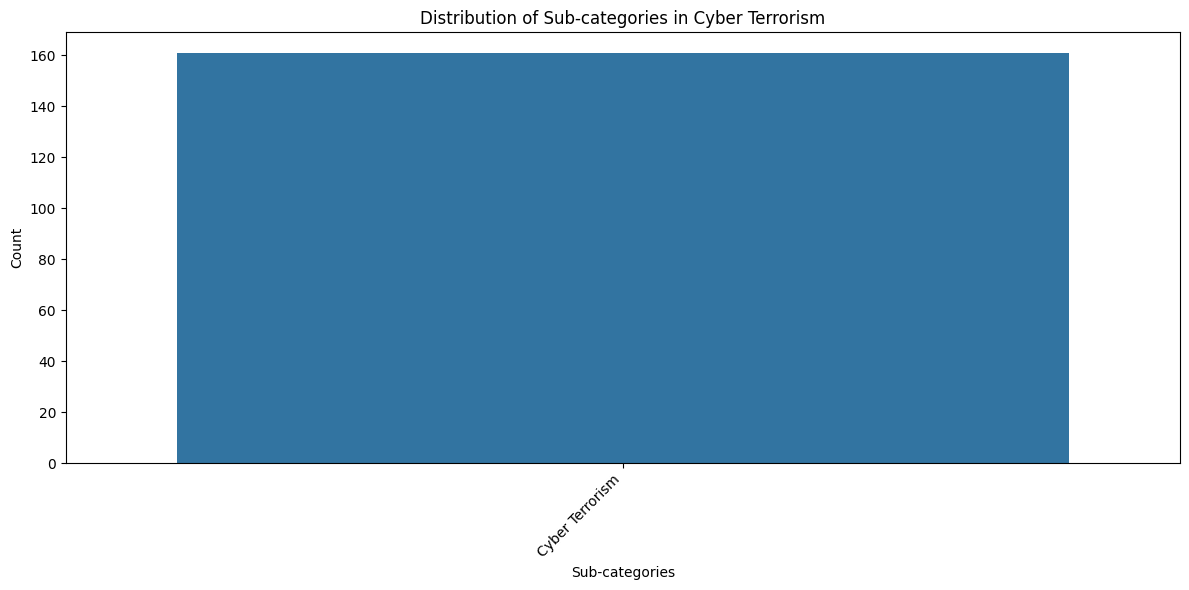

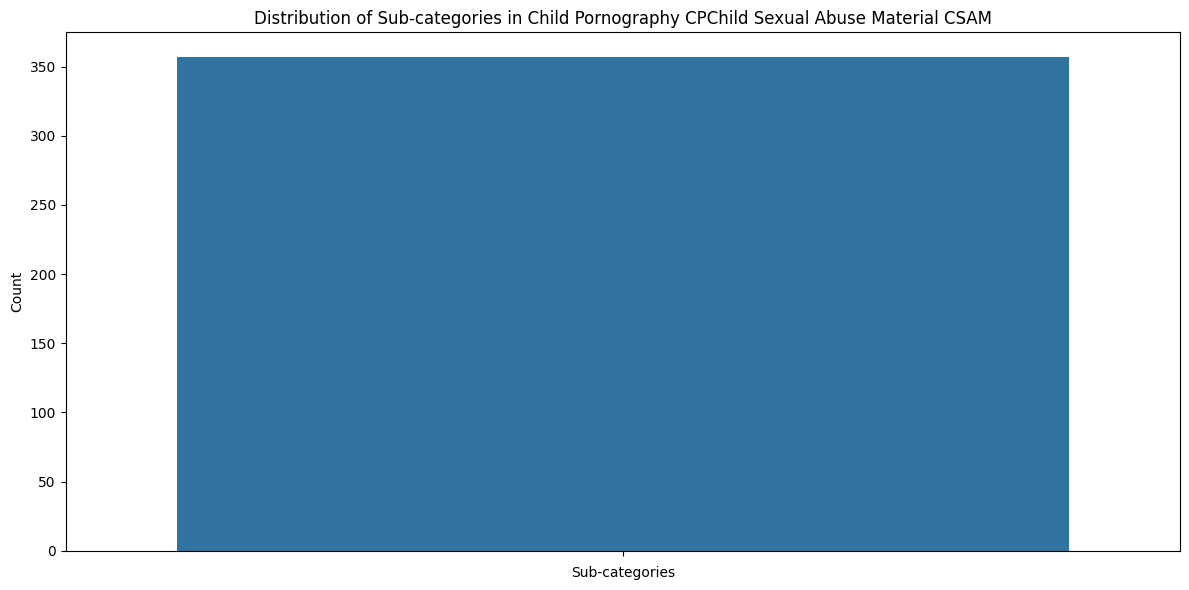

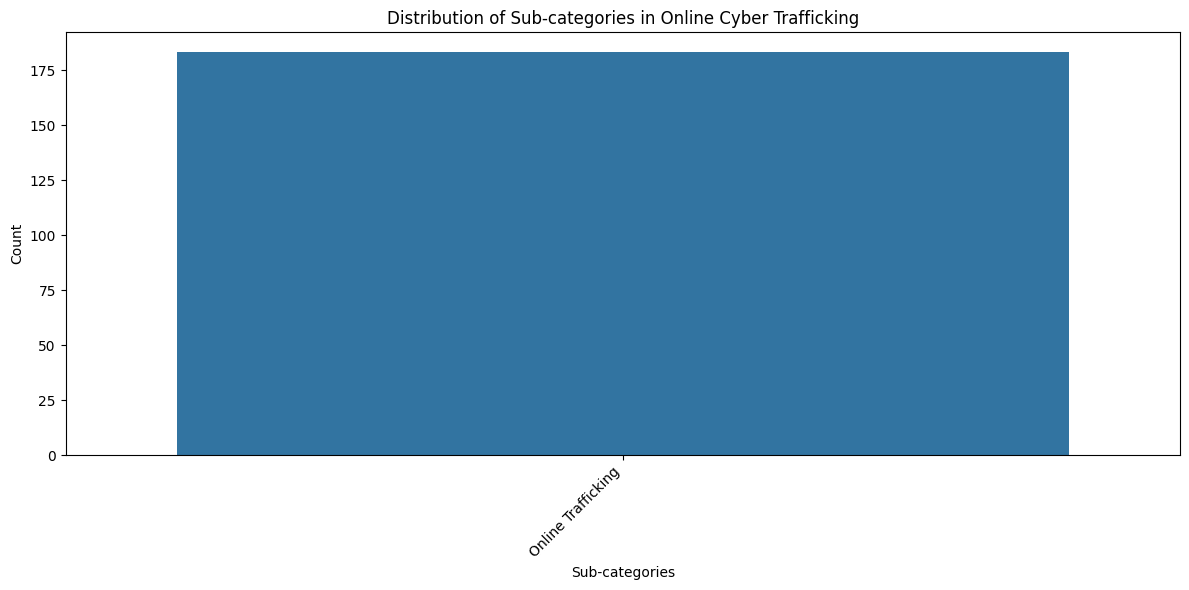

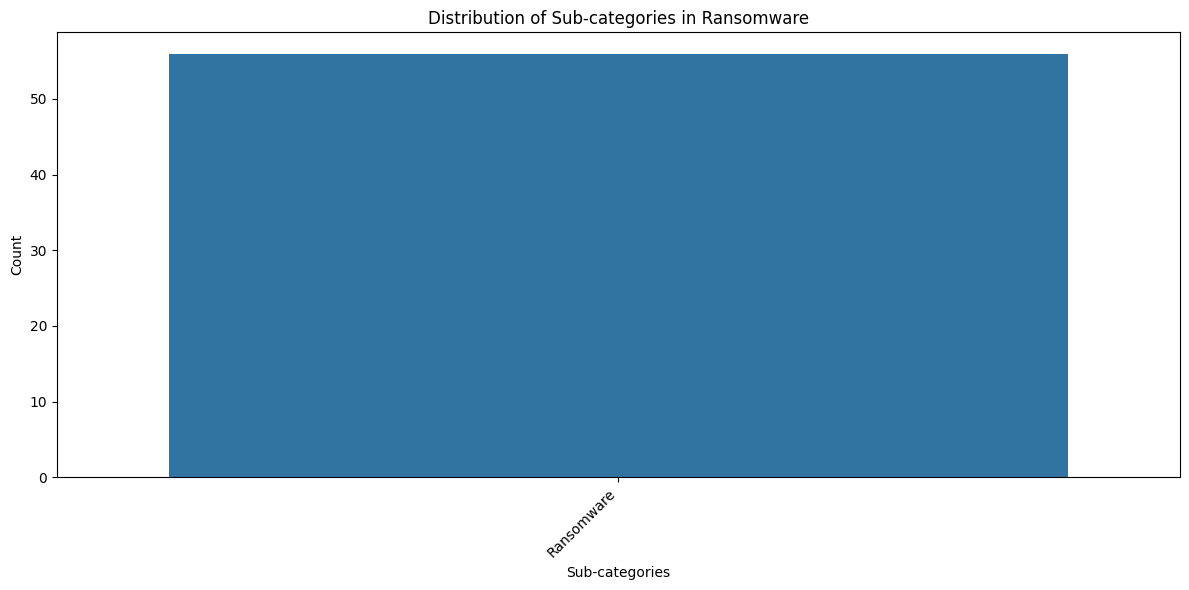

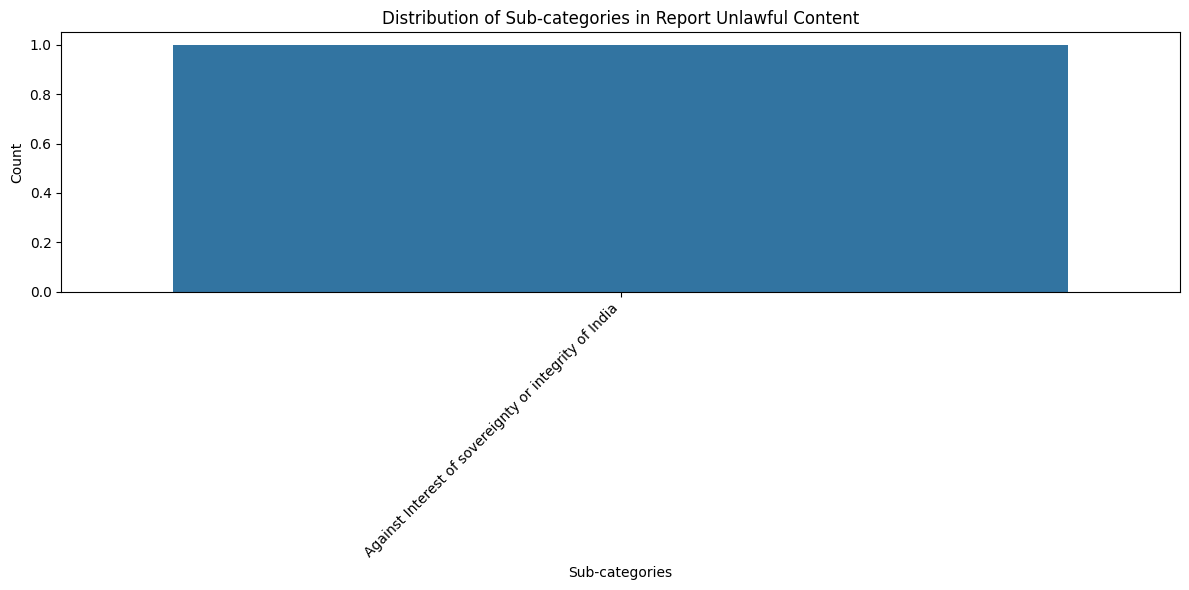

In [40]:
# Loop through each unique category
for category in train['category'].unique():
    # Filter data for the current category
    category_data = train[train['category'] == category]
    
    # Create subplot
    plt.figure(figsize=(12, 6))
    
    # Create bar plot for subcategories
    sns.countplot(data=category_data, x='sub_category')
    
    # Customize the plot
    plt.title(f'Distribution of Sub-categories in {category}')
    plt.xlabel('Sub-categories')
    plt.ylabel('Count')
    
    # Rotate x-axis labels for better readability
    plt.xticks(rotation=45, ha='right')
    
    # Adjust layout to prevent label cutoff
    plt.tight_layout()
    
    # Show the plot
    plt.show()

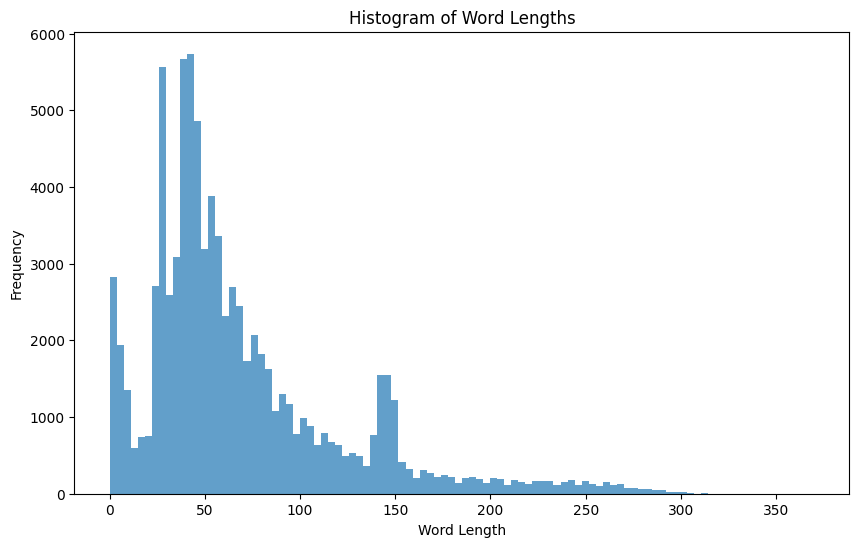

In [31]:
# Text length analysis
train['text_length'] = train['crimeaditionalinfo'].apply(lambda x: len(x.split()))

plt.figure(figsize=(10, 6))
plt.hist(train['text_length'].explode().dropna(), bins=100, alpha=0.7)
plt.title('Histogram of Word Lengths')
plt.xlabel('Word Length')
plt.ylabel('Frequency')
plt.show()

In [35]:
pd.cut(train['text_length'], bins=list(range(0,400,20))).value_counts()

text_length
(40, 60]      21833
(20, 40]      20036
(60, 80]      11866
(0, 20]        6916
(80, 100]      6646
(140, 160]     5132
(100, 120]     4020
(120, 140]     2965
(160, 180]     1353
(180, 200]      995
(200, 220]      871
(220, 240]      813
(240, 260]      774
(260, 280]      520
(280, 300]      214
(300, 320]       35
(360, 380]        1
(320, 340]        0
(340, 360]        0
Name: count, dtype: int64

In [43]:
import string

# Converting to lowercase
def convert_to_lowercase(text):
    return text.lower()

# Removing whitespaces
def remove_whitespace(text):
    return text.strip()

# Removing punctuations
def remove_punctuation(text):
    punct_str = string.punctuation
    punct_str = punct_str.replace("'", "") # discarding apostrophe from the string to keep the contractions intact
    return text.translate(str.maketrans("", "", punct_str))

# Removing HTML tags
def remove_html(text):
    html = re.compile(r'<.*?>')
    return html.sub(r'', text)

# Removing other unicode characters
def remove_http(text):
    http = "https?://\S+|www\.\S+" # matching strings beginning with http (but not just "http")
    pattern = r"({})".format(http) # creating pattern
    return re.sub(pattern, "", text)

# Dictionary of acronyms
acronyms_url = 'https://raw.githubusercontent.com/sugatagh/E-commerce-Text-Classification/main/JSON/english_acronyms.json'
acronyms_dict = pd.read_json(acronyms_url, typ = 'series')
pd.DataFrame(acronyms_dict.items(), columns = ['acronym', 'original']).head()

,acronym,original
0,aka,also known as
1,asap,as soon as possible
2,brb,be right back
3,btw,by the way
4,dob,date of birth
